1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Number of atoms after decaying process
Atoms Tl: 14
Atoms Pb: 986


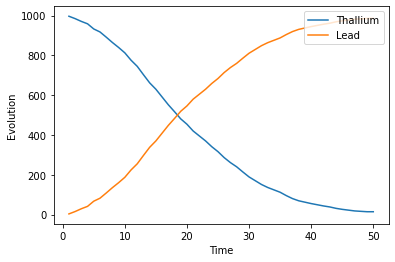

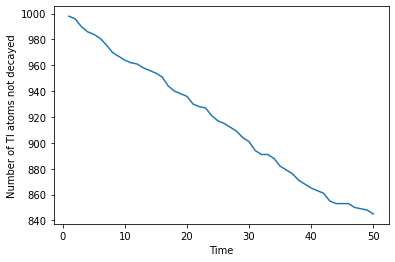

In [10]:
import numpy as np
import random
import matplotlib.pyplot as pl
from math import log

T=np.ones(1000)
P=np.array([])
time_steps=50 #total time steps

tau=183.12 #3.052 min
dt=1 #time step
time=0 #set time to 0

T_evolution=np.array([])
P_evolution=np.array([])

def p(t):
    result=1-2**(-t/tau)
    return result

for i in range(time_steps):
    time=time+dt
    j=0
    while j<len(T):
        r=random.random()
        if r<=p(time):
            T=np.delete(T, j)
            P=np.append(P, 1)
        j+=1    
    T_evolution=np.append(T_evolution, len(T)) 
    P_evolution=np.append(P_evolution, len(P))
    
print("Number of atoms after decaying process")
print("Atoms Tl:", len(T))
print("Atoms Pb:", len(P))

time_axis=np.arange(1, time_steps+1)

pl.plot(time_axis, T_evolution, label="Thallium", color='C0')
pl.plot(time_axis, P_evolution, label="Lead", color='C1')
pl.xlabel("Time")
pl.ylabel("Evolution")
pl.legend(loc="upper right")
pl.show()


print("")


def p2(t):
    result=(2**(-t/tau))*(log(2)/tau)
    return result

samples=np.array([])
time=0
atoms=1000

for i in range(time_steps):
    time=time+dt
    j=0
    c=0 #number of decays
    while j<atoms:
        r=random.random()
        if r<=p2(time):
            c+=1 #+1 decaying
            atoms-=1 #-1 atom not decayed
        j+=1
    samples=np.append(samples, atoms)
    
pl.plot(time_axis, samples)
pl.xlabel("Time")
pl.ylabel("Number of Tl atoms not decayed")
pl.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [ ]:
from math import tan, pi

z=79 #gold
e=1.6e-19 #electric charge
e0=8.85e-12 #permittivity
E=12.32e-13 #energy
a0=5.29e-11 #Bohr radius
sigma=a0/100
n=1e6 #number of alpha particles

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [4]:
import numpy as np
from math import sin, sqrt

def f(x):
    arg=1/(x*(2-x))
    result=(sin(arg))**2
    return result

N=10000
x=np.linspace(0.001, 1.999, N)

#Hit miss method
c=0

for i in range(N):
    y=np.random.random()
    if y<=f(x[i]):
        c=c+1
        
intg=2*c/N

print("Result with hit miss method:", intg)


#Mean value method
array_of_func_f=np.array([])

for i in range(N):
    value=f(x[i])
    array_of_func_f=np.append(array_of_func_f, value)
    
mean_f=(2/N)*np.sum(array_of_func_f)
var_f=np.std(array_of_func_f)
error=2*sqrt(var_f)/sqrt(N)

print("Result with mean value method:", mean_f)
print("Error mean value method:", error)

Result with hit miss method: 1.4542
Result with mean value method: 1.452131945725772
Error mean value method: 0.01026453613393072


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [24]:
import numpy as np
from math import sqrt

def w(x):
    return 1/sqrt(x)

def f(x):
    result=(x**(-1/2))/(np.exp(x)+1)
    return result

N=10000
samples=np.linspace(0, 1, N)
array_of_func_w=np.array([])

#To calculate the integral of w(x) we use the mean value method
for i in range(1, N):
    value=w(samples[i])
    array_of_func_w=np.append(array_of_func_w, value)

mean_w=(1/N)*np.sum(array_of_func_w)

#Then we proceed with importance sampling
array_of_func_f_divided_w=np.array([])

for i in range(1, N):
    value=f(samples[i])/w(samples[i])
    array_of_func_f_divided_w=np.append(array_of_func_f_divided_w, value)

I=(1/N)*np.sum(array_of_func_f_divided_w)*mean_w

print(I)

0.7540682535740602
